In [1]:
#import tensorflow as tf
from sqn_optimizer_hooks import SQNOptimizer
from sd_lbfgs import SdLBFGS
import hw1_functions as hw1
import numpy as np
from time import sleep
from pprint import pprint
import matplotlib.pyplot as plt
import seaborn as sns

Instructions for updating:
Use the retry module or similar alternatives.


In [2]:
%matplotlib inline

In [3]:
sns.set_context('talk')

In [4]:
# boyd optimizer
optimizer = SdLBFGS(lambda x: hw1.boyd_example_func(x,order=1), np.random.rand(2).reshape(2,1) * 0.8, batch_size=4)
boyd_result = optimizer.run();

In [6]:
# weird func optimizer
fo0 = lambda x: hw1.weird_func(x, order=1)
optimizer = SdLBFGS(fo0, np.random.randn(1), batch_size=2)
weird_result = optimizer.run();

In [61]:
n = 200
H = np.random.rand(n, n)
HTH = H.T * H + n * np.eye(n,n)
b = np.random.randn(n).reshape(n,1)

result =np.linalg.cholesky(HTH) # test positive definiteness
HTH

array([[  2.00008791e+02,   4.42746502e-01,   2.67342065e-03, ...,
          2.11463597e-01,   7.96670782e-01,   1.06529047e-02],
       [  4.42746502e-01,   2.00835860e+02,   1.58936467e-01, ...,
          2.61155084e-02,   3.60912405e-01,   1.58469071e-01],
       [  2.67342065e-03,   1.58936467e-01,   2.00072102e+02, ...,
          1.04725802e-01,   5.87175852e-01,   8.76929361e-01],
       ..., 
       [  2.11463597e-01,   2.61155084e-02,   1.04725802e-01, ...,
          2.00154929e+02,   1.39491725e-01,   2.65424323e-01],
       [  7.96670782e-01,   3.60912405e-01,   5.87175852e-01, ...,
          1.39491725e-01,   2.00047567e+02,   2.16660121e-01],
       [  1.06529047e-02,   1.58469071e-01,   8.76929361e-01, ...,
          2.65424323e-01,   2.16660121e-01,   2.00119061e+02]])

In [62]:
quadratic_fun = lambda x: hw1.quadratic(x,  HTH, b, order=1)

In [64]:
quadratic_fun = lambda x: hw1.quadratic(HTH, b, x, order=1)
optimizer = SdLBFGS(quadratic_fun, np.random.rand(n).reshape(n,1), batch_size=2)
quadratic_result = optimizer.run();

In [67]:
quadratic_result['iteration_grad_errs']

[array([[ 3589261.7100957]]),
 array([[  2.07354116e+11]]),
 array([[  1.78005423e+10]]),
 array([[  3.24232821e+09]]),
 array([[  8.10502608e+08]]),
 array([[  2.47582671e+08]]),
 array([[ 86689427.94966352]]),
 array([[ 33542118.21657843]]),
 array([[ 14016989.71723266]]),
 array([[ 6229770.57476296]]),
 array([[ 2912694.55335604]]),
 array([[ 1421064.04645473]]),
 array([[ 719034.33889065]]),
 array([[ 375496.18364901]]),
 array([[ 201606.18686371]]),
 array([[ 110937.61209177]]),
 array([[ 62402.40680155]]),
 array([[ 35803.52313863]]),
 array([[ 20914.66508964]]),
 array([[ 12419.13045607]]),
 array([[ 7486.08299463]]),
 array([[ 4575.36866279]]),
 array([[ 2832.39621265]]),
 array([[ 1774.35300075]]),
 array([[ 1123.90779655]]),
 array([[ 719.30098979]]),
 array([[ 464.83335224]]),
 array([[ 303.13496163]]),
 array([[ 199.38696423]]),
 array([[ 132.21191729]]),
 array([[ 88.34201489]]),
 array([[ 59.45836877]]),
 array([[ 40.29473492]]),
 array([[ 27.48696149]]),
 array([[ 18.867

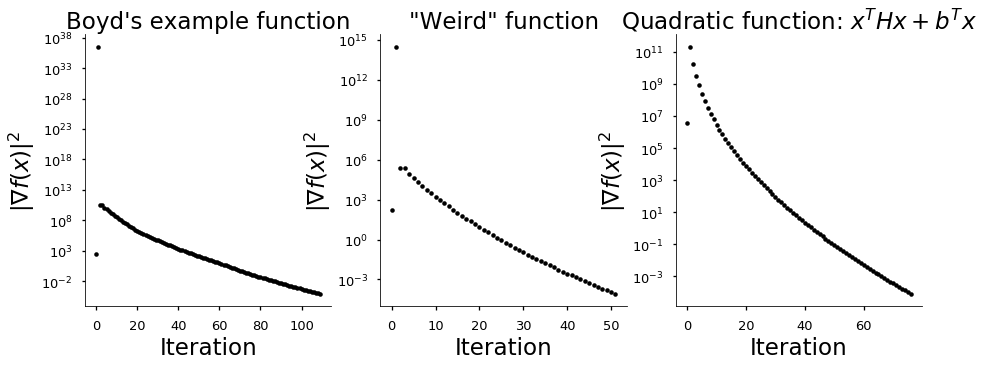

In [68]:
fig, (ax_boyd, ax_weird, ax_quadratic) = plt.subplots(1,3, figsize=(15,5));
fs = 23
yboyd = np.array(boyd_result['iteration_grad_errs'])
ax_boyd.plot(yboyd[:,0,0], 'k.')
ax_boyd.set_xlabel('Iteration', fontsize=fs)
ax_boyd.set_ylabel('$\|\\nabla f(x) \|^2$', fontsize=fs)
ax_boyd.set_title('Boyd\'s example function', fontsize=fs)
ax_boyd.semilogy()
sns.despine()

weird_y = np.array(weird_result['iteration_grad_errs'])
ax_weird.plot(weird_y, 'k.')
ax_weird.set_xlabel('Iteration', fontsize=fs)
ax_weird.set_ylabel('$\\|\\nabla f(x) \\|^2$', fontsize=fs)
ax_weird.set_title('"Weird" function', fontsize=fs)
ax_weird.semilogy()
sns.despine()

quadratic_y = np.array(quadratic_result['iteration_grad_errs'])
ax_quadratic.plot(quadratic_y[:,0,0], 'k.')
ax_quadratic.set_xlabel('Iteration', fontsize=fs)
ax_quadratic.set_ylabel('$\\|\\nabla f(x) \\|^2$', fontsize=fs)
ax_quadratic.set_title('Quadratic function: $x^T Hx + b^T x$', fontsize=fs)
ax_quadratic.semilogy()
sns.despine()

fig.savefig('../plots/sanity_checks.eps', bbox_inches='tight')

In [14]:
ls ../plots

higgs_dataset.eps                   sanity_checks.eps
higgs_dataset-eps-converted-to.pdf  sanity_checks-eps-converted-to.pdf


In [116]:
grads = np.loadtxt('gradient_norms.txt')

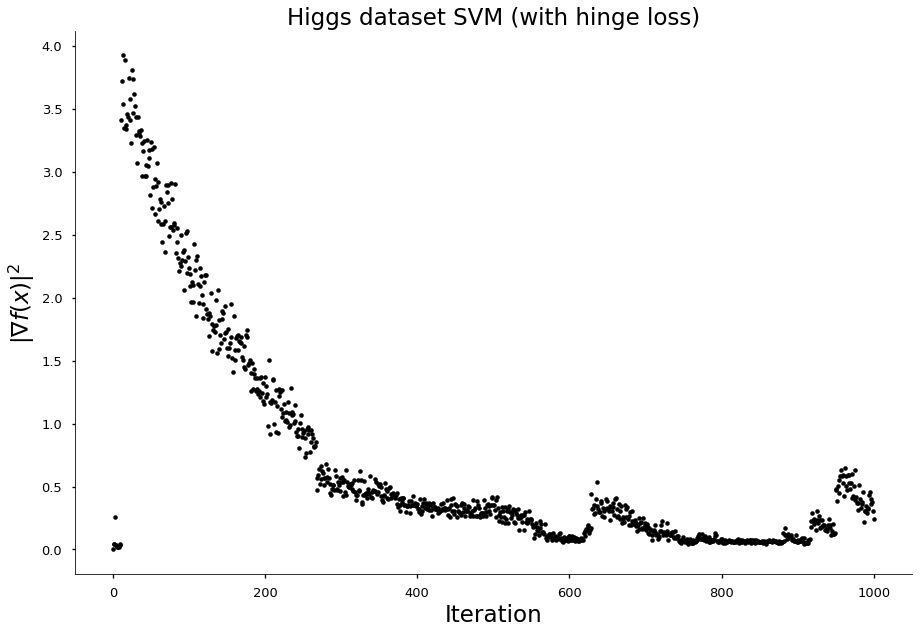

In [124]:
fig, ax = plt.subplots(figsize=(15,10))
ax.plot(grads, 'k.')
ax.set_xlabel('Iteration', fontsize=fs)
ax.set_ylabel('$\\|\\nabla f(x) \\|^2$', fontsize=fs)
ax.set_title('Higgs dataset SVM (with hinge loss)', fontsize=fs)
sns.despine()
fig.savefig('../../plots/higgs_dataset.eps', bbox_inches='tight')